# FYS-STK4155 Project #1 - Regression Analysis

Evaluation of Project number: 1 <br />
Name: Lennart Lehmann (ERASMUS Student)

## Abstract 

In this project we parameterize digital terrain data by using three different regression algorithms: <br /> 
**1.) Linear Regression / Ordinary Least Squares (OLS)** <br />
**2.) Ridge Regression** <br />
**3.) Lasso Regression** <br />
Utilizing Cross-Validation as resampling technique to judge the bias and variance of the different models. <br /> 
We find that the OLS method scores the best for our underlying data, followed by the Lasso Regression and ending up last with the Ridge Regression.
Displaying the bias-variance tradeoff reveals that we our model is mostly dominated in the bias area and the variance basically no effect on the mean error.

## Introduction

Linear regression methods are fundamental in the field of statistical modelling. In the simplest
variant of regression analysis modelling a response dependent on some predictor variables
a linear ansatz is assumed for the relasionship between response and predictors. The
ansatz is linear in the sense of a linear combination of (possibly non-linear) functions of a single
predictor. This linearity allows the matrix-vector equations resulting from minimizing the
error between the observed data (targets) and the predicted model data to be solved, which
is the main advantage of the method (and the main reason why linear regression is extensively
used today). In the modern society, data is ubiquitous and abundant. However, with an ever increasing volume
of data availability, drawing sensible conclusions about the relasionships between variables
is non-trivial. Suppose you were given a complete set of statistics about every school
district in Norway: The grade point average (and indeed individual grades) of every single
student, the size and composition (in terms of nationalities, gender, height, weight, etc.) of every
class, a full description of the teaching load of every teacher, as well as their personal data,
educational history, and work history. Such a data set might be readily available, but drawing
conclusions from it is not easy. Say e.g. that you wanted to know if increasing the number of
teachers per pupil would result in overall better grades. Or a more complex question what
is the most efficient way to increase the overall grades of students?
Such questions pertaining to relationships between data of varying types are possible to answer
using regression analysis, and bound on the statistical significance of the answers are possible
to find. In the following, we will consider a much simpler toy problem as a simple introduction
to the topic: Fitting a real valued function of two real variables. We will start out by considering
the theory behind linear regression.

This dataset included 102.234 transactions for each single feature. So we have an overall Matrix $\boldsymbol{X}$ of the shape $ X \in {\rm I\!R^{n\times p}}$ <br /> 

$$
\mathbf{X} =
      \begin{bmatrix} x_{1,1} & x_{1,2} & ... & x_{1,p} \\
                                 x_{2,1} & x_{2,2} & ... & x_{2,p} \\
                                   \vdots & \ddots & \ddots & \vdots \\
                                  x_{n,1} & x_{n,2} & ... & x_{n,p}
             \end{bmatrix}\qquad 
$$


## Formalism

Within the scope of this project we used the three aforementioned techniques to accomplish our goal.
We will dive into the theory behind those algorithms and implement them afterwards accordingly.
<br /> 

### Ordinary Least Squares (OLS)

Considering a case with $p$ predictors and of $n$ measured samples. Along we have the target $y$, a vector of size *n*: $\boldsymbol{y} =[y_1, y_2,\dots, y_{n}]^T$. The predictors are organized in a matrix $\boldsymbol{X}$, called *design matrix*, with the shape $\boldsymbol{X}\in {\mathbb{R}}^{n\times p}$
In regression we want to construct a function <br /> 

$$
\boldsymbol{y} = \boldsymbol{X}\beta + \epsilon \tag{1}
$$

where $\epsilon$ denotes a zero mean normal distributed noise of our linear model. 
$\beta$ is an unknown vector that counts to estimate in the regression problem. <br /> 

The objective function (also known as Cost function) of linear regression is thus the best possible linear fit  <br />

$$
 C(\boldsymbol{X}, \boldsymbol{\beta})= \frac{1}{n}\left\{(\boldsymbol{X}\boldsymbol{\beta} - \boldsymbol{y})^T(\boldsymbol{X}\boldsymbol{\beta} - \boldsymbol{y})\right\}. \tag{2}
$$

By minimizing the Mean of Squared Errors (MSE): <br />

$$
{\displaystyle \min_{\boldsymbol{\beta}\in
{\mathbb{R}}^{p}}}\frac{1}{n}\left\{\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)^T\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)\right\}. \tag{3}
$$

### Ridge Regression

Considering the Objective function from Linear Regression, which is the Mean Squarred Error (MSE), we could also express it as follows: <br />

$$
{\displaystyle \min_{\boldsymbol{\beta}\in
{\mathbb{R}}^{p}}}\frac{1}{n}\sum_{i=0}^{n-1}\left(y_i-\tilde{y}_i\right)^2=\frac{1}{n}\vert\vert \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\vert\vert_2^2, \tag{4}
$$

We can further simplify it with the expression of the norm-2 vector (a.k.a $L^2$ regularization): <br />

$$
\vert\vert \boldsymbol{x}\vert\vert_2 = \sqrt{\sum_i x_i^2}. \tag{5}
$$

By adding a regularization parameter $\lambda$, that keeps the weights from taking abnormous values and help to fight against overfitting, we obtain <br />
In ridge regression we include a **regularizer**. This involves a new cost function which leads to a new estimate for the weights $\boldsymbol{\beta}$. This results in a penalized regression problem. The cost function is given by: <br />

$$
{\displaystyle \min_{\boldsymbol{\beta}\in
{\mathbb{R}}^{p}}}\frac{1}{n}\vert\vert \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\vert\vert_2^2+\lambda\vert\vert \boldsymbol{\beta}\vert\vert_2^2 \tag{6}
$$

This leads to our new optimization equation: <br />

$$
{\displaystyle \min_{\boldsymbol{\beta}\in
{\mathbb{R}}^{p}}}\frac{1}{n}\vert\vert \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\vert\vert_2^2+\lambda\vert\vert \boldsymbol{\beta}\vert\vert_1 \tag{7}
$$


### Lasso Regression

Lasso Regression is very similiar to Ridge Regression, **but** instead of taking the $L^2$ regularization, Lasso utilizes the $L^1$ regularization, which is defined as follows: <br />

$$
\vert\vert \boldsymbol{x}\vert\vert_1 = \sum_i \vert x_i\vert. \tag{8}
$$

Hence, our optimization equation is just a slight twist to our known Ridge Regression to eventually obtain the following Lasso Regression: <br />

$$
{\displaystyle \min_{\boldsymbol{\beta}\in
{\mathbb{R}}^{p}}}\frac{1}{n}\vert\vert \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\vert\vert_2^2+\lambda\vert\vert \boldsymbol{\beta}\vert\vert_1 \tag{9}
$$

In the **Least Absolute Shrinkage and Selection Operator** (LASSO)-method we obtain a third cost function. <br />
$$
\begin{equation}
    C(\boldsymbol{X}, \boldsymbol{\beta}; \lambda) = (\boldsymbol{X}\boldsymbol{\beta} - \boldsymbol{y})^T(\boldsymbol{X}\boldsymbol{\beta} - \boldsymbol{y}) + \lambda \sqrt{\boldsymbol{\beta}^T\boldsymbol{\beta}}.
\label{_auto22} \tag{10}
\end{equation}
$$

### Resampling methods

Resampling methods are crucial in Machine learning, especially when dealing with limited amount of data. <br />
The main idea behind resampling is to repeatedly draw (different) samples from the dataset and split those accrodingly into test - and training data. Every single run a model gets fitted on the training data set and eventually evaluated with its test dataset. The final output will then be the average of the testing accuracy of all performed runs. <br />
However, this nice feature comes to the cost of computation. Since models have to be fitted every single time and evaluated on different subsets of the data, resampling methods such as *k-fold Cross Validation* or *Bootstrapping* are computationally
expensive. <br />
*Bootstrapping* is a statistical technique for estimating quantities about a population by taking averages over estimates from several smaller data samples. <br />
Those samples are constructed by drawing random observations from a large data sample (usually the training set in Machine Learning) with replacement. <br />
By taking repeatedly small samples of a population, the bootstrap resampling method calculates the statistics (Mean Squarred Error (MSE), bias, variance) of those samples. This will result in an indication of the appropriate order of model complexity. <br />

#### Cross- Validation

Cross-Validation is used to split the entire data into 2 groups, calles *training* and *test data*. A model's performance is always evaluated on the *test data* by calculating the accuracy metrics on this data set with the given targets and model's predictions. <br />
By splitting the entire data into *k-even subsets* (where $k \in [1, 2, ..., n]$), we obtain a training dataset of size *k-1* subsets and one subset of test data. This technique is calles *k-fold Cross Validation*. <br /> 
Afterwards each single subset will be once used as test data which will in turn lead to *k* runs of the exact same model (same hyperparameters) but different training and test data for each run. Hence, each run returns a test error on its underlying test data. By averaging the test errors by the *k* number of runs, we obtain the final model accuracy.<br /> 
Thus, *Cross-Validation* is used to asses the performance of a given model. <br />

### Terrain Data

We were given a dataset containing an area of Tinn, Norway with its land surface topology and a resolution of roughly 30m (1 arc-second).  <br> 
The data was retrieved from U.S. Department of the Interior U.S. Geological Survey's (USGS) EarthExplorer [1] website. <br />
USGS stores data from the Shuttle Radar Topography Mission (SRTM), which maps the earth's land surface topology with the aforementioned resolution. <br />
This project will use SRTM data taken from the EarthExplorer website as the foundation of the terrain parametrization. The specific terrain data we will use in the present project is taken from the Mosvatn Austfjell area in the municipality of Tinn in Telemark county, Norway. A visual representation of the data is shown in Fig. 1. <br />


#### Franke's Function

The [Franke function](http://www.dtic.mil/dtic/tr/fulltext/u2/a081688.pdf) was originally developed to test and rate different surface interpolation techniques.

The Franke function, which is a weighted sum of four exponentials reads as follows: <br />

$$
\begin{align*}
f(x,y) &= \frac{3}{4}\exp{\left(-\frac{(9x-2)^2}{4} - \frac{(9y-2)^2}{4}\right)}+\frac{3}{4}\exp{\left(-\frac{(9x+1)^2}{49}- \frac{(9y+1)}{10}\right)} \\
&+\frac{1}{2}\exp{\left(-\frac{(9x-7)^2}{4} - \frac{(9y-3)^2}{4}\right)} -\frac{1}{5}\exp{\left(-(9x-4)^2 - (9y-7)^2\right) }.
\end{align*} \tag{11}
$$

The function will be defined for $x,y\in [0,1]$.



## Code and Implementation
*Readability of Code, Implementation and testing and discussion of Benchmarks*

In [19]:
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
from random import random, seed
import matplotlib.pyplot as plt
from imageio import imread
from matplotlib import cm
import RegressionMethods # own class with methods
from PIL import Image
import numpy as np
import os

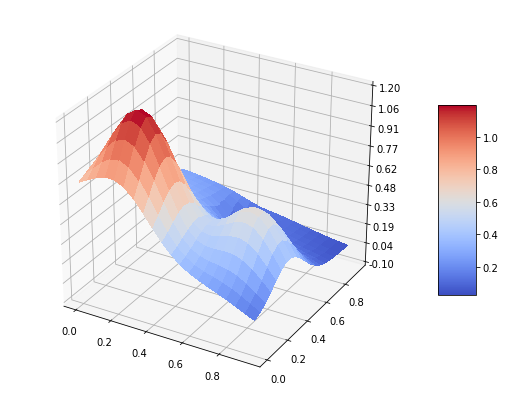

In [21]:
# Franke Function
fig = plt.figure(figsize=(9,7))
ax = fig.gca(projection='3d')

# Make data.
x = np.arange(0, 1, 0.05)
y = np.arange(0, 1, 0.05)
x, y = np.meshgrid(x,y)


def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4


z = FrankeFunction(x, y)

# Plot the surface.
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-0.10, 1.20)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()
#plt.savefig(os.getcwd() + "\\plots\\franke_01.png")

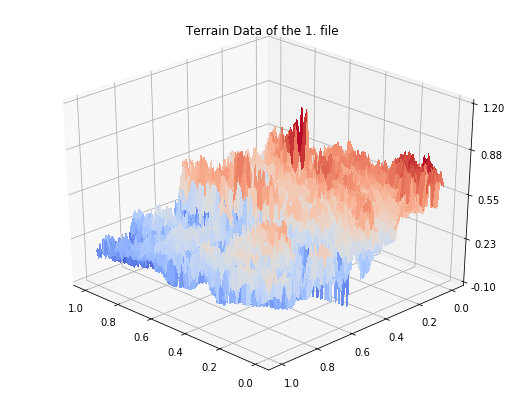

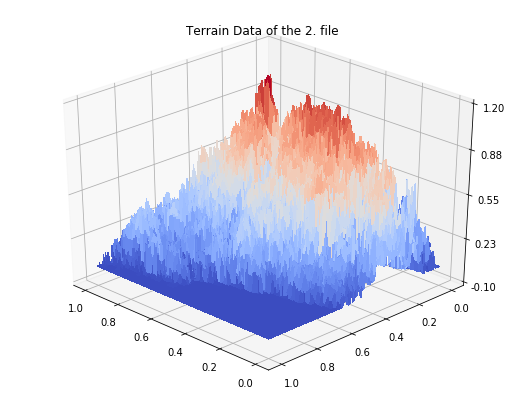

In [18]:
def plot_terrain(file_number=1) :
    fileName = os.path.join(os.getcwd(), 'SRTM_data_Norway_' + str(file_number) + '.tif')
    image = Image.open(fileName, mode='r')
    image.mode = 'I'
    #image.show()
    x = np.linspace(0, 1, image.size[0])
    y = np.linspace(0, 1, image.size[1])
    X,Y = np.meshgrid(x,y)
    Z = np.array(image)
    Z = Z - np.min(Z)
    Z = Z / np.max(Z)
    fig = plt.figure(figsize=(9,7))
    ax = fig.gca(projection='3d')

    ax.plot_surface(X,Y,Z,cmap=cm.coolwarm,linewidth=0, antialiased=False)
    ax.set_zlim(-0.10, 1.20)
    ax.set_title("Terrain Data of the " + str(file_number) + ". file")
    ax.zaxis.set_major_locator(LinearLocator(5))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    ax.view_init(30, 45+90)
    #plt.savefig(os.path.join(os.path.dirname(__file__), 'figures', 'terrain'+str(file_number)+'.png'), transparent=True, bbox_inches='tight')
    plt.show()
plot_terrain()
plot_terrain(2)

In [ ]:
# Least Squares 
import numpy as np
from sklearn import linear_model, metrics

def OLSFit(X, y):
'''
        Performs the ordinary linear regression fit using the *from scratch* 
        implementation. The matrix calculation performed corresponds to 
                ╭   T   ╮-1  T
            β = │ X   X │   X  y,
                ╰       ╯  
        where b is the vector of beta values, Xt denotes the tranpose of X and 
        inv(A) is the inverse of the matrix A.
        If the matrix Xt X is found to be too singular to numerically invert, 
        a SVD is used to perform the fit, as 
                   ╭   ╮-1  T
            β =  V │ Σ │   U  y
                   ╰   ╯   
'''

    U,S,Vt = np.linalg.svd(X, full_matrices=True)
    S_inverse = np.zeros(shape=X.shape)
    S_inverse[:S.shape[0], :S.shape[0]] = np.diag(1.0 / S)
    beta = np.dot(Vt.T, np.dot(S_inverse.T, np.dot(U.T, y)))
    return np.dot(X, beta) # prediction
    
def ridge(X, y):
    beta = np.dot(np.linalg.inv(np.dot(np.transpose(X),X) + self.lambda_ * np.eye(X.shape[1])), np.dot(np.transpose(X),y))
    return np.dot(X, beta) # prediction

def scipyRidge(lamda, X, y) :
    if lamda == None :
        raise ValueError("No lambda value set for Ridge regression.")
    regression = linear_model.Ridge(fit_intercept=True, alpha=self.lambda_)
    regression.fit(X,y)
    beta = regression.coef_
    beta[0] = regression.intercept_
    return regression.predict(X)

def scipyLasso(lamda, X, y) :
    if lamda == None:
        raise ValueError("No lambda value set for Lasso regression.")
    regression = linear_model.Lasso(fit_intercept=True, max_iter=100000, alpha=self.lambda_)
    regression.fit(X,y)
    beta = regression.coef_
    beta[0] = regression.intercept_
    return regression.predict(X)
    
def predict(X, beta):
    return np.dot(X, beta)

def getMSE(targets, predictions):
     return metrics.mean_squared_error(targets, predictions)
    
def getR2(targets, predictions):
     return metrics.r2_score(targets, predictions)

In [ ]:
# Design Matrix
def CreateDesignMatrix_X(x, y, n = 5):
    """
    Function for creating a design X-matrix with rows [1, x, y, x^2, xy, xy^2 , etc.]
    Input is x and y mesh or raveled mesh, keyword agruments n is the degree of the polynomial you want to fit.
    """
    if len(x.shape) > 1:
        x = np.ravel(x)
        y = np.ravel(y)

    N = len(x)
    l = int((n+1)*(n+2)/2)
    X = np.ones((N,l))

    for i in range(1,n+1):
        q = int((i)*(i+1)/2)
        for k in range(i+1):
            X[:,q+k] = x**(i-k) * y**k

    return X


def computeMatrix(matrix, x, degree):
    ind = 1
    for i in range(1, degree+1):
        for j in range(i+1):
            matrix[:, ind] = x[:,0]**(i-j) * x[:,1]**j
            ind += 1

def getMatrixPolynom(self, x):
    """Computes the design matrix for a polynomial of a given combined degree
    Computes the design matrix of 2D polynomial type with degree specified 
    in the input to the constructor. The first column contains unity, 
    the subsequent columns are evaluated as 
        ╭     ╮      ╭        ╮ 
        │  X  │ =  p │ x , y  │ 
        ╰   ij╯     j╰  i   i ╯ 

    with X being the design matrix and (x, y) being the 2D input data set. 
    The polynomial p is the j-th polynomial in the set of linearly 
    independent combined polynomials 
                   2    2         3    3    2        2    4    4
        x ,  y ,  x ,  y , xy ,  x ,  y ,  x y ,  x y ,  x ,  y , ...
    of combined total degree self.degree. There are n(n+3)/2 such 
    different monomials/polynomials in a set of degree n.

    Paramters
    ---------
    x : numpy.array
        The data set, a 2D numpy array, used for the construction of
        the design matrix
    """
    """
    # Degree 1
    0:  lambda x,y : x,
    1:  lambda x,y : y,
    # Degree 2
    2:  lambda x,y : x**2        ,
    3:  lambda x,y : x    * y    ,
    4:  lambda x,y :        y**2 ,
    # Degree 3
    5:  lambda x,y : x**3        ,
    6:  lambda x,y : x**2 * y    ,   
    7:  lambda x,y : x    * y**2 ,
    8:  lambda x,y :        y**3 ,
    """
    N = x.shape
    N = N[0]

    # The total number of polynomials up to and including combined 
    # total degree self.degree, i.e. 2, 5, 9, 14, 20, 27... . This
    # is just the sum of the integers, 
    #
    #     n+1         n (n + 3)
    #      Σ   k   =  ─────────  =  P
    #     k=2             2          n
    #

    P = int(degree*(degree+3)/2)

    matrix = np.zeros(shape=(N, P+1))
    matrix[:,0] = 1.0
    computeMatrix(matrix, x, degree)

In [ ]:
# fit Linear Regression with x,y up to 5th order to it
for degree in [2, 3, 4, 5]:
    designMatrix = DesignMatrix('polynomial2D', degree)
    leastSquares = LeastSquares(backend='manual')


### Let's start with k-fold cross validation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures

# A seed just to ensure that the random numbers are the same for every run.
# Useful for eventual debugging.
np.random.seed(3155)

# Generate the data.
nsamples = 100
x = np.random.randn(nsamples)
y = 3*x**2 + np.random.randn(nsamples)

## Cross-validation on Ridge regression using KFold only

# Decide degree on polynomial to fit
poly = PolynomialFeatures(degree = 6)
# Decide which values of lambda to use
nlambdas = 500
lambdas = np.logspace(-3, 5, nlambdas)

# Initialize a KFold instance
k = 5
kfold = KFold(n_splits = k)

# Perform the cross-validation to estimate MSE
scores_KFold = np.zeros((nlambdas, k))

i = 0
for lmb in lambdas:
    ridge = Ridge(alpha = lmb)
    j = 0
    for train_inds, test_inds in kfold.split(x):
        xtrain = x[train_inds]
        ytrain = y[train_inds]

        xtest = x[test_inds]
        ytest = y[test_inds]

        Xtrain = poly.fit_transform(xtrain[:, np.newaxis])
        ridge.fit(Xtrain, ytrain[:, np.newaxis])

        Xtest = poly.fit_transform(xtest[:, np.newaxis])
        ypred = ridge.predict(Xtest)

        scores_KFold[i,j] = np.sum((ypred - ytest[:, np.newaxis])**2)/np.size(ypred)

        j += 1
    i += 1


estimated_mse_KFold = np.mean(scores_KFold, axis = 1)
estimated_mse_sklearn = np.zeros(nlambdas)
i = 0
for lmb in lambdas:
    ridge = Ridge(alpha = lmb)

    X = poly.fit_transform(x[:, np.newaxis])
    estimated_mse_folds = cross_val_score(ridge, X, y[:, np.newaxis], scoring='neg_mean_squared_error', cv=kfold)

    # cross_val_score return an array containing the estimated negative mse for every fold.
    # we have to the the mean of every array in order to get an estimate of the mse of the model
    estimated_mse_sklearn[i] = np.mean(-estimated_mse_folds)

    i += 1

## Plot and compare the slightly different ways to perform cross-validation

plt.figure()

plt.plot(np.log10(lambdas), estimated_mse_sklearn, label = 'cross_val_score')
plt.plot(np.log10(lambdas), estimated_mse_KFold, 'r--', label = 'KFold')

plt.xlabel('log10(lambda)')
plt.ylabel('mse')

plt.legend()

plt.show()

In [1]:
import os
import numpy as np
import pandas as pd

# import visual libraries
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D 
plt.style.use('ggplot')

# import the SKLearn palette
from sklearn.svm import SVC
from sklearn.externals import joblib
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.grid_search import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, confusion_matrix, accuracy_score

In [ ]:
# defining some variables that all algorihtms share
cross_val = 10 # let's do a 10-fold cross validation for our hyperparameter search

In [ ]:
# read in the data and check the first entries
pathToHappiness = os.getcwd() + '\\assignment1_data.csv'
happinessDataFrame = pd.read_csv(pathToHappiness)
happinessDataFrame.head()

In [7]:
# print the shape of the dataframe and check whether we have null values in our Happyness Df
print(happinessDataFrame.shape)
print(happinessDataFrame.isnull().any().sum())

'C:\\Users\\Lenny\\Documents\\Studium_Robotics (M.Sc.)\\Semester 3 - Oslo ERASMUS\\01_Applied Data Analysis and Machine Learning\\Project 1\\assignment1_data.csv'

### Data Preprocessing

In order to get a first glimpse of the data, I usually take a look at the distribution of the labels (True vs. False). <br />
Here we can already see, whether we deal with an **imbalanced dataset**, which would lead to a really bad classification at the end, or whether we have approximately the same numbers for True and False labels which would be a balanced dataset. <br />
Furthermore, we also have to check for any *NaN* values, which would also distort our classifier. <br /> 

Personally, I like making correlation plots to see how the features depend on one another which helps in the later steps to drop specific features in order to reduce the computation complexity. <br />

Another important step is to convert any categorical value to numerical values, since the classifiers can't handle non-numeric data. This can be done by one-hot encoding or similiar techniques. <br /> 

Lastly, normalizing the data helps to deal with outliers better, since they will not weight that much anymore and in general we will have a conform input for each single feature into our classifier. <br />
<br /> 

So, let's get our hands dirty and massage the data the way it loves it!

In [ ]:
# Now let's make a deep dive into our data and first check the labels to see with which kind of data we have to deal this time
entireTransactions = happinessDataFrame.shape[0]
disgustingFraudsters = happinessDataFrame[happinessDataFrame['Class'] == 1]
sweetNonFraudsters = happinessDataFrame[happinessDataFrame['Class'] == 0]

relativeFraudsters = len(disgustingFraudsters)/entireTransactions
relativeNonFraudsters = len(sweetNonFraudsters)/entireTransactions

# print the % value of Fraudsters vs. non Fraudsters to get a better feeling of our data at hand
print('FRAUDSTERS: {}% vs. NON FRAUDSTERS: {}%'.format(relativeFraudsters*100, relativeNonFraudsters*100))

# let's visualize our balance of fraudster vs non fraudsters
labels = ['non-fraud','fraud']
classes = pd.value_counts(happinessDataFrame['Class'], sort = True)
classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), labels)
plt.xlabel("Class")
plt.ylabel("Frequency")

In [ ]:
# since we also have categorical data we have to convert it to numerical data
# for this purpose I just use standard conversion techniques like one-hot encoding for the gender, ...



In [ ]:
# let's check how the features correlate with one another
correlation_matrix = happinessDataFrame.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(correlation_matrix,vmax=0.8,square = True)
plt.show()

### Correlation Plot

based on our feature correlation plot we can see that not so many features correlaate with each other. Thus, dropping one feature would not affect any other one.
Here, since the ID might lead to some unwanted bias and it does not correlate with any other feature I will drop this column to reduce the complexity of the data and have an unbiased, non discriminating predictor at the end

In [ ]:
# Next, since the dataset is highly unbiased we have to balance it by using the same amount of fraudsters vs. non-fraudsters
# Let's shuffle the data before creating the subsamples
df = happinessDataFrame.sample(frac=1)

frauds = happinessDataFrame[happinessDataFrame['Class'] == 1]
non_frauds = happinessDataFrame[happinessDataFrame['Class'] == 0][:len(frauds)]

new_dataFrame = pd.concat([non_frauds, frauds])
# Shuffle dataframe rows
new_dataFrame = new_df.sample(frac=1, random_state=38)
# Let's plot the Transaction class against the Frequency
labels = ['non frauds','fraud']
classes = pd.value_counts(new_dataFrame['Class'], sort = True)
classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), labels)
plt.xlabel("Class")
plt.ylabel("Frequency")

In [ ]:
# Now let's drop the unnecessary features we don't want our classifier to utilize for its predictions
features = new_dataFrame.drop(['Class'], axis = 1)
features = features.drop(['ID'], axis = 1)
labels = pd.DataFrame(new_dataFrame['Class'])

feature_array = features.values
label_array = labels.values

In [ ]:
# finally split our data into train (80%) and test (20%) datasets
X_train, X_test, y_train, y_test = train_test_split(feature_array,label_array,test_size=0.20)

# Normalize our data to handle outliers in a better way and have conform inputs over all features
X_train = normalize(X_train)
X_test = normalize(X_test)


## K Nearest Neighbor (k-NN) as first approach

[this link](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) is going to the SK Learn kNN function with all its parameters.

In [ ]:
# k nearest neighbor approach to ckeck the baseline <-- we want to beat this accuracy
neighbours = np.arange(1,30) # evaluate up to 30 neighbors
train_accuracy = np.empty(len(neighbours))
test_accuracy = np.empty(len(neighbours))

# evaluate the optimal number of k for our dataset
for i,k in enumerate(neighbours):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k, algorithm="kd_tree", n_jobs=-1)
    
    #Fit the model (.ravel() - function is flattening the array)
    knn.fit(X_train,y_train.ravel())
    
    #Compute accuracy on the training and test set
    train_accuracy[i] = knn.score(X_train, y_train.ravel())
    test_accuracy[i] = knn.score(X_test, y_test.ravel())
    
# plot the different accuracies w.r.t. the amount of k-neighbors
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbours, test_accuracy, label='Testing Accuracy')
plt.plot(neighbours, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

# select the maximum accuracy (of test dataset)
idx = np.where(test_accuracy == max(test_accuracy))
optimal_k = neighbours[idx]

# fit the final k-NN classifier to our dataset
knn = KNeighborsClassifier(n_neighbors=optimal_k, algorithm="kd_tree", n_jobs=-1)
knn.fit(X_train,y_train.ravel())

# # save the model 
# filename = os.getcwd() + 'finalized_kNN_model.sav'
# joblib.dump(knn, filename)

# # load model again and predict
# knn = joblib.load(filename)
# knn_predicted_test_labels = knn.predict(X_test)

# get the score
knn_accuracy_score  = accuracy_score(y_test, knn_predicted_test_labels)
knn_MSE             = mean_squared_error(y_test, knn_predicted_test_labels)
knn_r2              = r2_score(y_test, knn_predicted_test_labels)

print("Accuracy Score: {} \nMean Squared Error: {} \nR2 Score: {}".format(knn_accuracy_score, knn_MSE, knn_r2))

In [ ]:
# confusion Matrix for visualizing the classification task
LABELS = ['Non-Fraud', 'Fraud']
conf_matrix = confusion_matrix(y_test, knn_predicted_test_labels)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

## Support Vector Machines (SVM)

[this link](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) is going to the SK Learn SVM function with all its parameters.

In [ ]:
# evaluate the best soft margin model with different parameter settings
param_grid = { 
    'C': np.logspace(-3, 2, 6),
    'gamma': np.logspace(-3, 2, 6),
    'kernel': ['rbf', 'linear', 'sigmoid']
}
# set up our SVM classifier
svm_model = SVC(gamma='scale', c=c_range)

# check for the optimal paramters using GridSearch
parameterSearch_SVM = GridSearchCV(estimator=svm_model, param_grid=param_grid, refit=True, cv=cross_val)
parameterSearch_SVM.fit(X_train, y_train) 
print(parameterSearch_SVM.best_params_)
print('\n')
print(' ------------------------------------------------------------------------------------- ')

# Since the GridSearchCV already stores the best parameters, we can straight predict with that model
svm_predicted = parameterSearch_SVM.predict(X_test)

# # save the model 
# filename = os.getcwd() + 'finalized_SVM_model.sav'
# joblib.dump(parameterSearch_SVM, filename)

# # load model again and predict
# svm_model = joblib.load(filename)
# svm_predicted = svm_model.predict(X_test)

# get the score
svm_accuracy_score  = accuracy_score(y_test, svm_predicted)
svm_MSE             = mean_squared_error(y_test, svm_predicted)
svm_r2              = r2_score(y_test, svm_predicted)

print("Accuracy Score: {} \nMean Squared Error: {} \nR2 Score: {}".format(svm_accuracy_score, svm_MSE, svm_r2))

In [ ]:
# confusion Matrix for visualizing the classification task
LABELS = ['Non-Fraud', 'Fraud']
conf_matrix = confusion_matrix(y_test, svm_predicted)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

## Random Forests

[this link](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) is going to the SK Learn Random Forest function with all its parameters.

In [ ]:
# set up our Random Forest Classifier
rfc_model = RandomForestClassifier(n_jobs=-1, max_features='sqrt', n_estimators=50, oob_score=True)
param_grid = { 
    'n_estimators': [10, 30, 50, 100, 200, 400, 600, 800, 1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [3, 6, 10, 13, 15, 17, None],
}
# evaluate the best paramters for Random Forest
parameterSearch_RFC = GridSearchCV(estimator=rfc_model, param_grid=param_grid, refit=True, cv=cross_val)
parameterSearch_RFC.fit(X_train, y_train) 
print(parameterSearch_SVM.best_params_)
print('\n')
print(' ------------------------------------------------------------------------------------- ')

# predict the outputs for our test dataset
randomForest_predicted = parameterSearch_RFC.predict(X_test)

# get the score
rfc_accuracy_score  = accuracy_score(y_test, randomForest_predicted)
rfc_MSE             = mean_squared_error(y_test, randomForest_predicted)
rfc_r2              = r2_score(y_test, randomForest_predicted)

print("Accuracy Score: {} \nMean Squared Error: {} \nR2 Score: {}".format(rfc_accuracy_score, rfc_MSE, rfc_r2))

In [ ]:
# confusion Matrix for visualizing the classification task
LABELS = ['Non-Fraud', 'Fraud']
conf_matrix = confusion_matrix(y_test, randomForest_predicted)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

## Multi-Layered Perceptron (Neural Network)

[this link](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) describes all the MLP Paramters in the SK Learn library

In [ ]:
# set up the parameters we want to test as well as the classifier itself
parameters={
'learning_rate': ["constant", "invscaling", "adaptive"],
'hidden_layer_sizes': [(128, 256, 256, 64), (111, 168, 66), (122, 122), , (256, 512, 364, 168, 44), (123, 127, 55), (22, 33, 44, 22)],
'alpha': [10.0 ** -np.arange(1, 7)],
'activation': ["logistic", "relu", "Tanh"]
}
mlp_classifier = MLPClassifier(n_jobs=-1, max_features='sqrt', n_estimators=50, oob_score=True)

# create the grid Search
mlp = GridSearchCV(estimator=mlp_classifier, param_grid=parameters, n_jobs=-1, refit=True, cv=cross_val)
mlp.fit(X_train, y_train) 
print(mlp.best_params_)
print('\n')
print(' ------------------------------------------------------------------------------------- ')

# predict the values of our test dataset
mlp_predicted = mlp.predict(X_test)

# get the score
mlp_accuracy_score  = accuracy_score(y_test, mlp_predicted)
mlp_MSE             = mean_squared_error(y_test, mlp_predicted)
mlp_r2              = r2_score(y_test, mlp_predicted)

print("Accuracy Score: {} \nMean Squared Error: {} \nR2 Score: {}".format(mlp_accuracy_score, mlp_MSE, mlp_r2))


In [ ]:
# confusion Matrix for visualizing the classification task
LABELS = ['Non-Fraud', 'Fraud']
conf_matrix = confusion_matrix(y_test, mlp_predicted)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

## Comparison of all tested Algorithms

Now we have seen that each algorithm performs differently on the underlying dataset. 
In order to have it also more visually appealing, in the following chart we can see an overlay of each algorithm with its best tested Paramters on the Test set by using the Accuracy Score of each single algorithm. 

In [ ]:
objects = ('Random Forest', 'SVM', 'k-NN', 'MLP')
y_pos = np.arange(len(objects))
performance = [rfc_accuracy_score, svm_accuracy_score, knn_accuracy_score, mlp_accuracy_score]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('Test Accuracy across the ' + str(len(objects)) + ' used algorithms')

plt.show()

## Analysis

As shown in the previous section (**Code and Implementation**) we see that there have been some people who are at risk to not pay their debt in time. Thus, you can already send these people some help and offer some other duties they have to follow, etc. Here we only took a look at the data we have at hand (25 features) and neglect all the other (key) factors that could help us getting more insights about the persons' circumstances. <br />
However, we compared three different kind of Machine Learning algorithms with each other and benchmarked each single one of them. <br />
The overall plot tells us that Random Forests achieved better results than kNN or SVM, respectively. 
Since I have only limited computing power as well as time, I just used random variables for the Hyperparamter Search for all three Algorithms. <br />
Keep in mind that it might be possible that SVM outperforms Random Forest with a different kind of Parameter Setting, but for our case we can definitely say that the Random Forest had the best accuracy with the testes Paramters. <br />
On big problem with the dataset was is that it is unbalanced and we need to have balanced classes for each of the classification outputs otherwise our predictor will be biased (for further read on the impact on unbalanced datasets please check out [this thread](https://www.researchgate.net/post/Effect_of_imbalanced_data_on_machine_learning)) <br />
For better Accuracy of the Credit Card dataset one could scrape the web to see where they made the transactions and derive valuable insights based on that. Basically adding more data and more features to our training and test set to have a better expressiveness of our algorithm and our predictions. 

*Dive into the Analysis and plots from the previous section --> Correlation of single features with each other...* 

## Conclusions

We see that this dataset gives us already some really interesting facts and we can derive some nice predictions based on that. 
Now that we predicted some potential 'threats' in our customer base we can just directly approach these guys and try to help them out with offering them certain duties or suggesting different options for the credit card. 
Other ways to improve the accuracy of our system would be to either 
    1.) generate more data with more features
    2.) apply state of the art artificial neural networks (deep learning) algorithms such as DenseNet, etc.
If we go with 1.) we would need more time since every payment will be recorded and we would get more data based upon time. Another way to artifically generate more data would be by intelligently use other methods to renrich the feature space of our data. So instead of having 25 features we could augment it to 30 with additional features such as *usual shopping district*, *usual time of payments*, etc. 

The 2.) method suggests a modern approach of classification by modelling as good as possible to our training set and have predictions which usually outperform SVMs or Linear Regression methods for more complex datasets.

## References

[1] EarthExplorer website: https://earthexplorer.usgs.gov/, Used Dataset: Norway, last visited 05.09.2019 <br />
[2] Bishop, C.M. (2011). *Pattern Recognition and Machine Learning*. Cambridge: Springer. <br />
[3] Duda, R. O. (2007). *Pattern Classification*. San Jose: Wiley. <br />
[4] Murphy, K. P. (2007). *Machine Learning: A probabilistic Perspective*. Camebridge: MIT Press. <br />